## Re-slicing

In [1]:
# Import necessary packages
from nilearn import plotting
import SUITPy.reslice as reslice

/Users/jdiedrichsen/opt/miniconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


### Reslice image without mask
The reslice function takes at he mininum 2 input parameters: The name of the source images that you want to to reslice, and the deformation map.

In [5]:
output = reslice.reslice_image(source_image = 'anatomical_sess-01.nii',
                                    deformation = 'y_suitdef.nii')

In [6]:
output

### Reslice image with mask 
For cerebellar data analysis, it is good practice to mask the functional images to only retain the cerebellum before any smoothing occurrs. This prevents un-wanted spill-over of neocortical signal into the cerebellum. As a cerebellar mask you can use the mask produced in the [https://www.diedrichsenlab.org/imaging/suit_function.htm#suit_isolate_seg] of the matlab toolbox. 

In [8]:
output_img = reslice.reslice_image(source_image = 'anatomical_sess-01.nii', 
                                    deformation = 'y_suitdef.nii',
                                    mask = 'c_anatomical_sess-01_pcereb.nii')

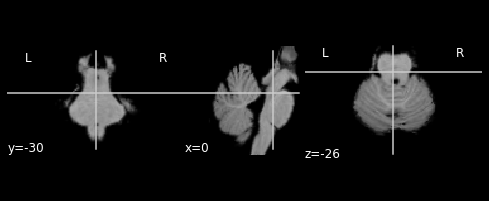

In [9]:
plotting.plot_anat(output_img)

### Specific voxel size
By default, the new image will be resliced into the same resolution and bouding box as the deformation map (y_xxx.nii). For functional data we often would like a different resolution. For this, you can simply specify the voxel size. 

In [6]:
output_img = reslice.reslice_image(source_image = 'anatomical_sess-01.nii',
                                    deformation = 'y_suitdef.nii',
                                    mask = 'c_anatomical_sess-01_pcereb.nii',
                                    voxelsize = (2,3,2))

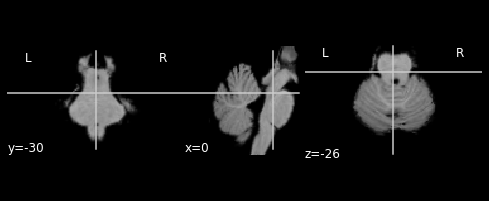

In [10]:
plotting.plot_anat(output_img)

In [11]:
# Voxel size has been changed.
output_img.affine

array([[  -1.,    0.,    0.,   70.],
       [   0.,    1.,    0., -100.],
       [   0.,    0.,    1.,  -75.],
       [   0.,    0.,    0.,    1.]])

### Specific image size

In [9]:
output_list = reslice.reslice_image(source_image = "anatomical_sess-01.nii",
                                    deformation = "y_suitdef.nii", 
                                    mask = "c_anatomical_sess-01_pcereb.nii", 
                                    imagesize=(150, 150, 150))

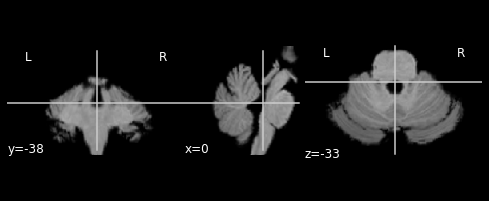

In [10]:
plotting.plot_anat(output_list)

In [11]:
# Image shape has been changed
output_list.shape

(150, 150, 150)